### Libraries Installation
First of all We will install the required Python libraries that will be used through out the program.

In [ ]:
pip install pyhealth

In [ ]:
pip install pyreadr

In [ ]:
pip install pandas

In [ ]:
pip install sklearn

In [ ]:
pip install tensorflow


### Pyhealth test/analysis

Since pyhealth provides basic MIMIC-3 datasets for healthcare projects, wanted to check if it contains required data for heart failure detection.

Conclusion: Pyhealth doesn't include necessary data attributes required for heart failure detection model.

In [ ]:
from pyhealth.datasets import MIMIC3Dataset
import pyreadr

# create MIMIC3Dataset object
mimic3base = MIMIC3Dataset(
    root="https://storage.googleapis.com/pyhealth/Synthetic_MIMIC-III/",
    tables=["DIAGNOSES_ICD", "PROCEDURES_ICD", "PRESCRIPTIONS"],
    # map all NDC codes to ATC 3-rd level codes in these tables
    code_mapping={"NDC": ("ATC", {"target_kwargs": {"level": 3}})},
)

In [ ]:
mimic3base.stat()

## Data Preprocessing

Data sets are extracted from PhysioNet website: (you need to have "CITI Data or Specimens Only Research" training completed & approved before you can access the data)
https://physionet.org/content/mimiciii/1.4/

Once you have access go to Files section on above link where you can download required data files.

1. Admissions: gives information regarding a patient’s admission to the hospital
2. Patients: Provides information on each patient
3. Diagnoses ICD: Contains ICD diagnoses for patients
4. ICU Stays: defines a single ICU stay
5. Lab events: Contains all laboratory measurements for a given patient

More information on dataset, fields etc can be found at: https://mimic.mit.edu/docs/iii/tables/

In [4]:

import pandas as pd
import numpy as np
import tensorflow as tf


Now, we will start reading data files one by one using read_csv() function into dataframe and look at the statistics around number of records, mean, min, max etc.

#### 1. Diagnoses ICD data file

## Note: Remember to download the data files from following google drive or as instructed above and place them in desired location. Once placed, please update the path in data_dir variable below.

https://drive.google.com/drive/folders/1Lsjg3Kl93L0pn5EYYsilsuX6Yl4d4Zy4?usp=sharing

In [5]:
data_dir = "/Users/sagardalwadi/Desktop/College/CS598-DLH/project/DLH_Project_CodeRepo_By_sagardd2/Data/"

# load the DIAGNOSES_ICD table as a Pandas dataframe
diagnoses_icd_df = pd.read_csv(data_dir + "DIAGNOSES_ICD.csv")

In [6]:
diagnoses_icd_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [7]:
# get the statistics of the dataframe
diagnoses_icd_stats = diagnoses_icd_df.describe()

# print the statistics
print(diagnoses_icd_stats)

              ROW_ID     SUBJECT_ID        HADM_ID        SEQ_NUM
count  651047.000000  651047.000000  651047.000000  651000.000000
mean   325524.000000   38971.159758  150017.744819       7.913836
std    187941.224689   29372.198841   28878.068648       6.072633
min         1.000000       2.000000  100001.000000       1.000000
25%    162762.500000   14562.500000  125028.000000       3.000000
50%    325524.000000   28671.000000  150140.000000       6.000000
75%    488285.500000   63715.000000  174978.000000      11.000000
max    651047.000000   99999.000000  199999.000000      39.000000


#### 2. Procedures data file
#### 3. Prescriptions data file

In [8]:
# load the PROCEDURES_ICD table as a Pandas dataframe
procedures_icd_df = pd.read_csv(data_dir + "PROCEDURES_ICD.csv")

# load the PRESCRIPTIONS table as a Pandas dataframe
prescriptions_df = pd.read_csv(data_dir + "PRESCRIPTIONS.csv")

/var/folders/rn/7x6fp0x16ql0c61l29_b61kr0000gn/T/ipykernel_71938/1573089679.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescriptions_df = pd.read_csv(data_dir + "PRESCRIPTIONS.csv")


In [9]:
# get the statistics of the dataframe
procedures_icd_stats = procedures_icd_df.describe()

# print the statistics
print(procedures_icd_stats)

              ROW_ID     SUBJECT_ID        HADM_ID        SEQ_NUM  \
count  240095.000000  240095.000000  240095.000000  240095.000000   
mean   120048.000000   32851.481472  150082.948591       4.388434   
std     69309.600778   27771.642798   28918.380367       3.772549   
min         1.000000       2.000000  100003.000000       1.000000   
25%     60024.500000   11615.000000  125186.000000       2.000000   
50%    120048.000000   23450.000000  149988.000000       3.000000   
75%    180071.500000   51951.000000  175340.000000       6.000000   
max    240095.000000   99999.000000  199999.000000      40.000000   

           ICD9_CODE  
count  240095.000000  
mean     5689.421350  
std      3307.832868  
min        10.000000  
25%      3614.000000  
50%      4319.000000  
75%      9390.000000  
max      9999.000000  


In [10]:
# get the statistics of the dataframe
prescriptions_stats = prescriptions_df.describe()

# print the statistics
print(prescriptions_stats)

             ROW_ID    SUBJECT_ID       HADM_ID    ICUSTAY_ID           NDC
count  4.156450e+06  4.156450e+06  4.156450e+06  2.708742e+06  4.151987e+06
mean   2.078226e+06  3.877274e+04  1.501000e+05  2.500046e+05  1.242073e+10
std    1.199864e+06  2.925289e+04  2.891754e+04  2.877529e+04  2.304565e+10
min    1.000000e+00  2.000000e+00  1.000010e+05  2.000010e+05  0.000000e+00
25%    1.039113e+06  1.457900e+04  1.251400e+05  2.250820e+05  7.101574e+07
50%    2.078226e+06  2.857600e+04  1.501580e+05  2.501880e+05  3.380550e+08
75%    3.117338e+06  6.317000e+04  1.752980e+05  2.748130e+05  9.045262e+08
max    4.156450e+06  9.999900e+04  1.999990e+05  2.999990e+05  8.770109e+10


#### 4. Admissions data file

In [11]:
# load the ADMISSIONS table as a Pandas dataframe
admissions_df = pd.read_csv(data_dir + "ADMISSIONS.csv")

In [12]:
# get the statistics of the dataframe
admissions_stats = admissions_df.describe()

# print the statistics
print(admissions_stats)

             ROW_ID    SUBJECT_ID        HADM_ID  HOSPITAL_EXPIRE_FLAG  \
count  58976.000000  58976.000000   58976.000000          58976.000000   
mean   29488.500000  33755.583288  149970.809584              0.099261   
std    17025.049075  28092.726225   28883.095213              0.299014   
min        1.000000      2.000000  100001.000000              0.000000   
25%    14744.750000  11993.750000  124952.750000              0.000000   
50%    29488.500000  24133.500000  149989.500000              0.000000   
75%    44232.250000  53851.500000  174966.500000              0.000000   
max    58976.000000  99999.000000  199999.000000              1.000000   

       HAS_CHARTEVENTS_DATA  
count          58976.000000  
mean               0.973006  
std                0.162067  
min                0.000000  
25%                1.000000  
50%                1.000000  
75%                1.000000  
max                1.000000  


In [13]:
admissions_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


#### 5. ICU Stays data file

In [14]:

# load the ICUSTAYS table as a Pandas dataframe
icustays_df = pd.read_csv(data_dir + "ICUSTAYS.csv")

# get the statistics of the dataframe
icustays_stats = icustays_df.describe()

# print the statistics
print(icustays_stats)

             ROW_ID    SUBJECT_ID        HADM_ID     ICUSTAY_ID  FIRST_WARDID  \
count  61532.000000  61532.000000   61532.000000   61532.000000  61532.000000   
mean   30766.500000  33888.605912  149954.470649  249962.710248     33.085663   
std    17762.902719  28127.690913   28898.895904   28890.574867     19.102204   
min        1.000000      2.000000  100001.000000  200001.000000      7.000000   
25%    15383.750000  12047.500000  124933.750000  224935.500000     14.000000   
50%    30766.500000  24280.500000  149911.500000  249940.000000     33.000000   
75%    46149.250000  54191.500000  174997.250000  274972.500000     52.000000   
max    61532.000000  99999.000000  199999.000000  299999.000000     57.000000   

        LAST_WARDID           LOS  
count  61532.000000  61522.000000  
mean      32.978206      4.917972  
std       19.028609      9.638784  
min        7.000000      0.000100  
25%       14.000000      1.108025  
50%       33.000000      2.092250  
75%       52.00000

#### 6. Patients data file

In [15]:
# load the PATIENTS table as a Pandas dataframe
patients_df = pd.read_csv(data_dir + "PATIENTS.csv")

# get the statistics of the dataframe
patients_stats = patients_df.describe()

# print the statistics
print(patients_stats)

             ROW_ID    SUBJECT_ID   EXPIRE_FLAG
count  46520.000000  46520.000000  46520.000000
mean   23260.500000  34425.772872      0.338758
std    13429.311598  28330.400343      0.473292
min        1.000000      2.000000      0.000000
25%    11630.750000  12286.750000      0.000000
50%    23260.500000  24650.500000      0.000000
75%    34890.250000  55477.500000      1.000000
max    46520.000000  99999.000000      1.000000


#### 7. Lab events data file

In [16]:
# load the LABEVENTS table as a Pandas dataframe
lab_events_df = pd.read_csv(data_dir + "LABEVENTS.csv")

# get the statistics of the dataframe
lab_events_stats = lab_events_df.describe()

# print the statistics
print(lab_events_stats)

lab_events_df = lab_events_df.loc[:500000, :]

             ROW_ID    SUBJECT_ID       HADM_ID        ITEMID      VALUENUM
count  2.785406e+07  2.785406e+07  2.224503e+07  2.785406e+07  2.493284e+07
mean   1.395852e+07  3.146391e+04  1.499675e+05  5.106214e+04  7.853220e+01
std    8.057287e+06  2.714177e+04  2.886231e+04  2.092624e+02  5.512982e+03
min    1.000000e+00  2.000000e+00  1.000010e+05  5.080000e+04 -4.140000e+02
25%    6.980364e+06  1.120500e+04  1.251080e+05  5.088200e+04  4.400000e+00
50%    1.396099e+07  2.258500e+04  1.498490e+05  5.098300e+04  1.820000e+01
75%    2.093829e+07  4.790600e+04  1.750200e+05  5.125000e+04  6.000000e+01
max    2.790765e+07  9.999900e+04  1.999990e+05  5.155500e+04  1.427200e+07


In [17]:
lab_events_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN
3,284,3,NaN,50804,2101-10-12 18:17:00,22,22.00,mEq/L,NaN
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal


In [18]:
lab_events_df = lab_events_df.dropna(axis=0)

In [19]:
lab_events_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
162,443,3,145834.0,50893,2101-10-20 16:40:00,8.2,8.2,mg/dL,abnormal
163,444,3,145834.0,50902,2101-10-20 16:40:00,99,99.0,mEq/L,abnormal
166,447,3,145834.0,50912,2101-10-20 16:40:00,3.2,3.2,mg/dL,abnormal
169,450,3,145834.0,50970,2101-10-20 16:40:00,4.8,4.8,mg/dL,abnormal
170,451,3,145834.0,50971,2101-10-20 16:40:00,5.4,5.4,mEq/L,abnormal


Now, we will merge multiple pandas data frames into a single data frame using the merge function based on common columns. The common columns used for merging are "SUBJECT_ID" and "HADM_ID". The data frames being merged are admissions_df, patients_df, diagnoses_icd_df, icustays_df, and lab_events_df.

The result of each merge operation is stored in a new data frame, which is then used as input for the next merge operation. The final merged data frame is named patient_admissions_icustays_lab.

In [20]:
# merge the tables together based on the common patient identifier
patient_admissions = pd.merge(admissions_df, patients_df, on="SUBJECT_ID")
patient_admissions_icd = pd.merge(patient_admissions, diagnoses_icd_df, on=["SUBJECT_ID", "HADM_ID"])
patient_admissions_icustays = pd.merge(patient_admissions_icd, icustays_df, on=["SUBJECT_ID", "HADM_ID"])
patient_admissions_icustays_lab = pd.merge(patient_admissions_icustays, lab_events_df, on=["SUBJECT_ID", "HADM_ID"])


# print the resulting dataframe
print(patient_admissions_icustays_lab.head())

/var/folders/rn/7x6fp0x16ql0c61l29_b61kr0000gn/T/ipykernel_71938/1066523934.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ROW_ID_x'} in the result is deprecated and will raise a MergeError in a future version.
  patient_admissions_icustays = pd.merge(patient_admissions_icd, icustays_df, on=["SUBJECT_ID", "HADM_ID"])


   ROW_ID_x  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0        21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1        21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
2        21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
3        21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
4        21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   

  DEATHTIME ADMISSION_TYPE    ADMISSION_LOCATION         DISCHARGE_LOCATION  \
0       NaN      EMERGENCY  EMERGENCY ROOM ADMIT  DISC-TRAN CANCER/CHLDRN H   
1       NaN      EMERGENCY  EMERGENCY ROOM ADMIT  DISC-TRAN CANCER/CHLDRN H   
2       NaN      EMERGENCY  EMERGENCY ROOM ADMIT  DISC-TRAN CANCER/CHLDRN H   
3       NaN      EMERGENCY  EMERGENCY ROOM ADMIT  DISC-TRAN CANCER/CHLDRN H   
4       NaN      EMERGENCY  EMERGENCY ROOM ADMIT  DISC-TRAN CANCER/CHLDRN H   

  INSURANCE  ...               INTIME              OUTTI

#### Data Analysis for ICD9_CODE

In [21]:
# Display the distribution of ICD-9 codes in the 'ICD9_CODE' column
print(patient_admissions_icustays_lab['ICD9_CODE'].value_counts())


4280     49169
4019     48221
5849     40118
42731    38719
51881    36166
         ...  
07041        2
72973        2
30392        2
7622         1
7452         1
Name: ICD9_CODE, Length: 1510, dtype: int64


In [22]:
# Check for records with ICD code '428.0'
icd_code = '4280'
icd_code_mask = patient_admissions_icustays_lab['ICD9_CODE'] == icd_code
icd_code_records = patient_admissions_icustays_lab[icd_code_mask]

# Display the records with ICD code '428.0'
print(icd_code_records)


         ROW_ID_x  SUBJECT_ID  HADM_ID            ADMITTIME  \
1980           26          26   197661  2126-05-06 15:16:00   
1981           26          26   197661  2126-05-06 15:16:00   
1982           26          26   197661  2126-05-06 15:16:00   
1983           26          26   197661  2126-05-06 15:16:00   
1984           26          26   197661  2126-05-06 15:16:00   
...           ...         ...      ...                  ...   
1948003       964         781   163526  2117-09-21 23:21:00   
1948004       964         781   163526  2117-09-21 23:21:00   
1948005       964         781   163526  2117-09-21 23:21:00   
1948006       964         781   163526  2117-09-21 23:21:00   
1948007       964         781   163526  2117-09-21 23:21:00   

                   DISCHTIME DEATHTIME ADMISSION_TYPE  \
1980     2126-05-13 15:00:00       NaN      EMERGENCY   
1981     2126-05-13 15:00:00       NaN      EMERGENCY   
1982     2126-05-13 15:00:00       NaN      EMERGENCY   
1983     2126-0

#### Derive Heart Failure Target variable

Given a large dataset of medical records, we need to identify patients who have heart failure using their ICD codes. We can define a list of ICD codes that are commonly associated with heart failure and use this list to flag patients in the dataset who have a heart failure diagnosis.



In [23]:
# Define heart failure ICD codes
hf_codes = ['4280', '4281', '4289','42820','42821','42822','42823','42830','42831','42832','42833']

# Create new column for heart failure flag
patient_admissions_icustays_lab['heart_failure'] = np.where(patient_admissions_icustays_lab['ICD9_CODE'].isin(hf_codes) , 1, 0)

In [24]:
patient_admissions_icustays_lab.head()

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,OUTTIME,LOS,ROW_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG,heart_failure
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,...,2196-04-10 15:54:00,1.1438,10626,51221,2196-04-09 10:14:00,35.9,35.9,%,abnormal,0
1,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,...,2196-04-10 15:54:00,1.1438,10644,51279,2196-04-09 10:14:00,4.00,4.0,m/uL,abnormal,0
2,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,...,2196-04-10 15:54:00,1.1438,10658,50931,2196-04-10 08:01:00,108,108.0,mg/dL,abnormal,0
3,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,...,2196-04-10 15:54:00,1.1438,10661,50971,2196-04-10 08:01:00,3.4,3.4,mEq/L,abnormal,0
4,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,...,2196-04-10 15:54:00,1.1438,10626,51221,2196-04-09 10:14:00,35.9,35.9,%,abnormal,0


In [25]:
# get the statistics of the dataframe
patient_admissions_icustays_lab_stats = patient_admissions_icustays_lab.describe()

# print the statistics
print(patient_admissions_icustays_lab_stats)

           ROW_ID_x    SUBJECT_ID       HADM_ID  HOSPITAL_EXPIRE_FLAG  \
count  1.948529e+06  1.948529e+06  1.948529e+06          1.948529e+06   
mean   4.731081e+02  3.770694e+02  1.514113e+05          2.289250e-01   
std    4.063520e+02  5.701346e+02  2.995156e+04          4.201410e-01   
min    1.000000e+00  2.000000e+00  1.000090e+05          0.000000e+00   
25%    2.510000e+02  1.880000e+02  1.281320e+05          0.000000e+00   
50%    4.580000e+02  3.570000e+02  1.496480e+05          0.000000e+00   
75%    6.790000e+02  5.400000e+02  1.771710e+05          0.000000e+00   
max    5.868500e+04  9.909600e+04  1.997650e+05          1.000000e+00   

       HAS_CHARTEVENTS_DATA      ROW_ID_y   EXPIRE_FLAG      ROW_ID_x  \
count          1.948529e+06  1.948529e+06  1.948529e+06  1.948529e+06   
mean           9.983685e-01  3.537325e+02  6.421639e-01  4.425028e+03   
std            4.035872e-02  3.177278e+02  4.793637e-01  4.224277e+03   
min            0.000000e+00  1.000000e+00  0.00000

From the final merged data frame, first identify what all columns we have. Once idnetified, determine what columnms are required further as an input to the model.

Based on that create another dataframe with required set of columns. Remove the duplicate records to avoid unnecessary training on the duplicates.

Finally, analyze the data by looking at the sample records, statistics etc.

In [26]:
columns = patient_admissions_icustays_lab.columns.tolist()
print(columns)

['ROW_ID_x', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID_y', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG', 'ROW_ID_x', 'SEQ_NUM', 'ICD9_CODE', 'ROW_ID_y', 'ICUSTAY_ID', 'DBSOURCE', 'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID', 'INTIME', 'OUTTIME', 'LOS', 'ROW_ID', 'ITEMID', 'CHARTTIME', 'VALUE', 'VALUENUM', 'VALUEUOM', 'FLAG', 'heart_failure']


In [27]:
input_df = patient_admissions_icustays_lab[['SUBJECT_ID','MARITAL_STATUS','DIAGNOSIS','GENDER','ICD9_CODE','LOS','ITEMID','VALUENUM','FLAG','heart_failure']]

In [28]:
input_df.head()
input_onehot_df = input_df

In [29]:
input_onehot_df.head()
input_onehot_df = input_onehot_df.drop_duplicates()

In [30]:
input_onehot_df.head()

,SUBJECT_ID,MARITAL_STATUS,DIAGNOSIS,GENDER,ICD9_CODE,LOS,ITEMID,VALUENUM,FLAG,heart_failure
0,22,MARRIED,BENZODIAZEPINE OVERDOSE,F,9678,1.1438,51221,35.9,abnormal,0
1,22,MARRIED,BENZODIAZEPINE OVERDOSE,F,9678,1.1438,51279,4.0,abnormal,0
2,22,MARRIED,BENZODIAZEPINE OVERDOSE,F,9678,1.1438,50931,108.0,abnormal,0
3,22,MARRIED,BENZODIAZEPINE OVERDOSE,F,9678,1.1438,50971,3.4,abnormal,0
4,22,MARRIED,BENZODIAZEPINE OVERDOSE,F,9693,1.1438,51221,35.9,abnormal,0


In [31]:
# get the statistics of the dataframe
input_onehot_stats = input_onehot_df.describe()

# print the statistics
print(input_onehot_stats)

         SUBJECT_ID           LOS        ITEMID      VALUENUM  heart_failure
count  1.456053e+06  1.454527e+06  1.456053e+06  1.456053e+06   1.456053e+06
mean   3.775844e+02  1.287129e+01  5.107288e+04  1.289660e+02   3.380715e-02
std    6.486656e+02  1.888934e+01  1.886428e+02  5.204479e+03   1.807325e-01
min    2.000000e+00  4.400000e-03  5.080300e+04  0.000000e+00   0.000000e+00
25%    1.880000e+02  2.524300e+00  5.089300e+04  7.550000e+00   0.000000e+00
50%    3.570000e+02  5.913300e+00  5.100600e+04  2.480000e+01   0.000000e+00
75%    5.460000e+02  1.232410e+01  5.126500e+04  7.700000e+01   0.000000e+00
max    9.909600e+04  1.173351e+02  5.151600e+04  1.772400e+06   1.000000e+00


### Create charts for data analysis

Create a set of histograms to visualize the distribution of the data for each variable in the input dataframe. The resulting figure shows a set of subplots, with each subplot displaying a histogram for a different variable. This can help to provide insight into the distribution of the data, such as whether it is normally distributed or skewed, and identify any outliers or patterns in the data.

In [32]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

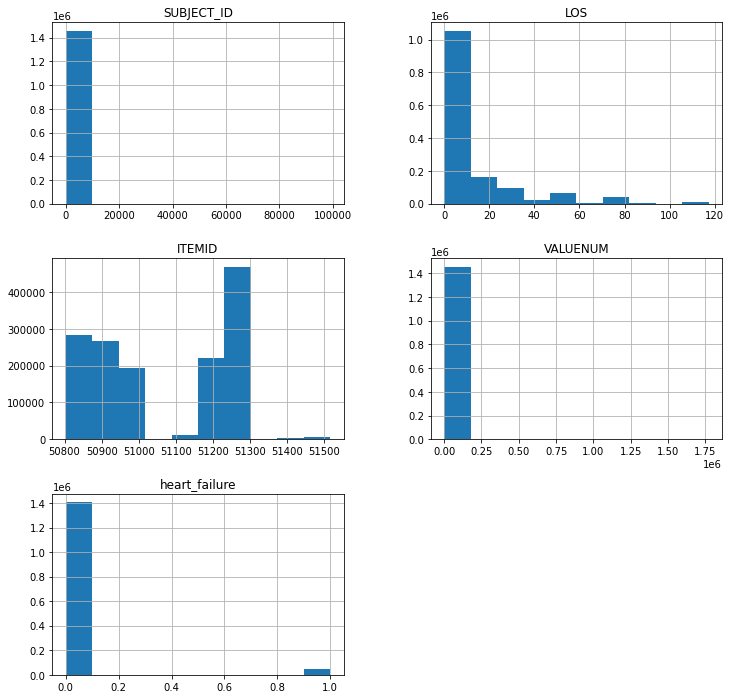

In [33]:
# plot histograms for each variable
input_onehot_df.hist(figsize = (12, 12))
plt.show()

The resulting bar chart displays the frequency of heart failure cases for each gender, with each bar representing a different gender. This type of chart is useful for comparing the number of cases between different categories and identifying any differences or patterns between them.

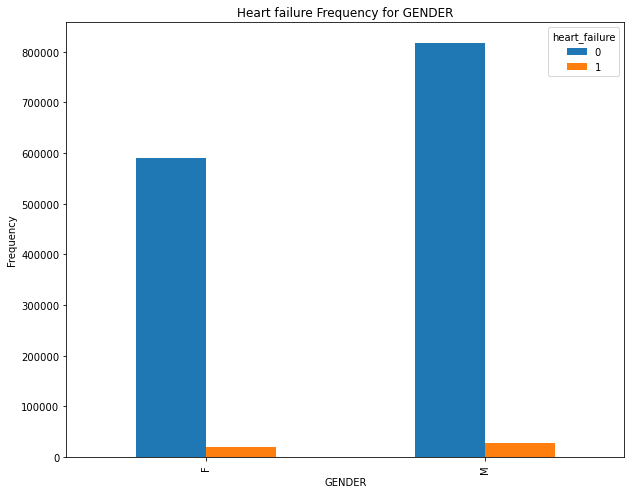

In [34]:
pd.crosstab(input_onehot_df.GENDER,input_onehot_df.heart_failure).plot(kind="bar",figsize=(10,8))
plt.title('Heart failure Frequency for GENDER')
plt.xlabel('GENDER')
plt.ylabel('Frequency')
plt.show()

## One-hot encoding
One-hot encoding is a popular technique used to transform categorical variables into a numerical representation that can be used in machine learning models. This technique creates binary features for each unique category in the original variable, where the value is 1 if the observation belongs to that category and 0 otherwise. One-hot encoding is useful because it preserves the original information about categories while avoiding any assumption of ordering or magnitude of values, and it allows the use of categorical data in various machine learning models that require numerical input.

Perform the one-hot encoding for the required columns in input dataframe and drop unnecessary columns.

In [35]:
one_hot = pd.get_dummies(input_onehot_df['MARITAL_STATUS'])
input_onehot_df = input_onehot_df.drop('MARITAL_STATUS', axis=1)
input_onehot_df = input_onehot_df.join(one_hot)

In [36]:
one_hot = pd.get_dummies(input_onehot_df['DIAGNOSIS'])
input_onehot_df = input_onehot_df.drop('DIAGNOSIS', axis=1)
input_onehot_df = input_onehot_df.join(one_hot)

In [37]:
one_hot = pd.get_dummies(input_onehot_df['GENDER'])
input_onehot_df = input_onehot_df.drop('GENDER', axis=1)
input_onehot_df = input_onehot_df.join(one_hot)

In [38]:
one_hot = pd.get_dummies(input_onehot_df['ITEMID'])
input_onehot_df = input_onehot_df.drop('ITEMID', axis=1)
input_onehot_df = input_onehot_df.join(one_hot)

In [39]:
one_hot = pd.get_dummies(input_onehot_df['FLAG'])
input_onehot_df = input_onehot_df.drop('FLAG', axis=1)
input_onehot_df = input_onehot_df.join(one_hot)

In [40]:
#one_hot = pd.get_dummies(input_onehot_df['ICD9_CODE'])
input_onehot_df = input_onehot_df.drop('ICD9_CODE', axis=1)
#input_onehot_df = input_onehot_df.join(one_hot)

input_onehot_df = input_onehot_df.drop('LOS', axis=1)
input_onehot_df = input_onehot_df.drop('SUBJECT_ID', axis=1)
input_onehot_df = input_onehot_df.drop('VALUENUM', axis=1)

In [41]:
input_onehot_df.head()

,heart_failure,DIVORCED,MARRIED,SEPARATED,SINGLE,UNKNOWN (DEFAULT),WIDOWED,+ETT;CORONARY ARTERY DISEASE\CATH,+ETT\CATH,3RD DEGREE HEART BLOCK,...,51458,51479,51482,51491,51493,51498,51514,51516,abnormal,delta
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
input_onehot_df.head()
print(input_onehot_df.shape[0])

input_limited_df = input_onehot_df.loc[:100, :]
print(input_limited_df.shape[0])

1456053
97


### Split into Training & testing

Split the input data (input_limited_df) into training and testing sets using the train_test_split() function from scikit-learn.

First, the input data is split into the independent variables X and the dependent variable y. The drop() function is used to remove the heart_failure column from X, since it contains the target variable that we want to predict.

Next, the train_test_split() function is called with the following arguments:

X and y are passed as the input data and target variable, respectively

test_size=0.2 specifies that 20% of the data should be used for testing, while the remaining 80% is used for training

random_state=42 sets the random seed for reproducibility

The function returns four arrays:

X_train and y_train: the training set, which will be used to fit the machine learning model

X_test and y_test: the testing set, which will be used to evaluate the performance of the model on unseen data

By splitting the data into training and testing sets, we can check the performance of the model on data that it has not seen before, which helps to avoid overfitting.

In [43]:
from sklearn.model_selection import train_test_split

# Split the data into input (X) and target (y) variables
X = input_limited_df.drop(['heart_failure'], axis=1)
y = input_limited_df['heart_failure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Implementation (RNN with GRU)

Import necessary libraries from Keras and converts training and testing data to a float32 data type. It then defines a neural network model using Keras with three layers: an Embedding layer, a GRU layer, and two dense layers. The Embedding layer is used to map the input data to a lower-dimensional space, while the GRU layer is a type of recurrent neural network that can model sequential data. The two dense layers are fully connected layers that add nonlinearity to the model. The activation functions used in the model are ReLU for the GRU and the first dense layer, and sigmoid for the final dense layer. A dropout layer is also included to help prevent overfitting. The model summary shows the details of each layer, including the number of parameters and the output shape.

In [45]:
from keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Embedding


X_train.astype('float32')
X_test.astype('float32')
# Define the number of features and the length of the input sequences
num_features = X_train.shape[1]
seq_length = 1

# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=2, output_dim=num_features, input_length=seq_length))
model.add(GRU(units=32, activation='relu', input_shape=(seq_length, num_features)))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 683)            1366      
                                                                 
 gru_1 (GRU)                 (None, 32)                68832     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 70,743
Trainable params: 70,743
Non-trainable params: 0
_________________________________________________________________


In [46]:
X_train.shape

(77, 683)

In [47]:
X_test.shape

(20, 683)

Model has been defined using the Keras library to train on the given input data X_train and target data y_train.

The compile() function has been called on the model to set the loss function, optimizer, and evaluation metric. Specifically, the binary cross-entropy loss function is being used with the Adam optimizer and accuracy is the evaluation metric.

The fit() function is then called on the model to train it on the training data X_train and y_train for 10 epochs with a batch size of 32. The validation data is provided to the model to evaluate the performance of the model on data that it has not seen before.

In [49]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#model.fit(X_train.values.reshape(-1, 1, num_features), y_train.values, epochs=10, batch_size=32, validation_data=(X_test.values.reshape(-1, 1, num_features), y_test.values))


model.fit(X_train, y_train, epochs=3, batch_size=5, validation_data=(X_test, y_test))

Epoch 1/3
16/16 [==============================] - 4s 157ms/step - loss: 0.4858 - accuracy: 1.0000 - val_loss: 0.2307 - val_accuracy: 1.0000
Epoch 2/3
16/16 [==============================] - 2s 140ms/step - loss: 0.1017 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 3/3
16/16 [==============================] - 2s 148ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 2.8143e-06 - val_accuracy: 1.0000


## Model evaluation

The trained neural network model is evaluated on the testing set to determine its accuracy. The function model.evaluate() is used to obtain the loss and accuracy values of the model on the testing set, which are then printed to the console using print(). The output of the code will show the test accuracy of the trained model.

In [50]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

1/1 [==============================] - 0s 263ms/step - loss: 2.8143e-06 - accuracy: 1.0000
Test accuracy: 1.0


Calculate various classification metrics on the testing set predictions.

First, it is using the trained model to predict the target variable on the testing set using model.predict(X_test). The predicted probabilities for each instance in the testing set are returned.

Finally, it prints a classification report using sklearn.metrics.classification_report(), which displays various metrics such as precision, recall, F1-score, and support for each class. The zero_division parameter is set to 1, which ensures that the classification report does not raise an exception when one of the classes has zero support.

In [51]:
from sklearn.metrics import classification_report

# Get the model predictions on the testing set
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.round(y_pred)

# Print classification report
print(classification_report(y_test, y_pred_labels, zero_division=1))

1/1 [==============================] - 0s 236ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

